In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [ ]:
import zipfile

local_zip = 'fixed-dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os

base_dir = '/content/fixed-dataset'
train_dir = os.path.join( base_dir, 'train')
test_dir = os.path.join( base_dir, 'test')
val_dir = os.path.join( base_dir, 'valid')

In [ ]:
from keras.applications.resnet50 import preprocess_input

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    color_mode='rgb',
    class_mode='sparse',
    shuffle=True,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    color_mode='rgb',
    class_mode='sparse',
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    color_mode='rgb',
    class_mode='sparse',
)

Found 6227 images belonging to 44 classes.
Found 220 images belonging to 44 classes.
Found 220 images belonging to 44 classes.


In [ ]:
label = {y:x for x,y in test_generator.class_indices.items()}

In [ ]:
label

{0: 'ANHINGA',
 1: 'ASIAN CRESTED IBIS',
 2: 'BALI STARLING',
 3: 'BANDED BROADBILL',
 4: 'BARN OWL',
 5: 'BARN SWALLOW',
 6: 'BORNEAN BRISTLEHEAD',
 7: 'BORNEAN LEAFBIRD',
 8: 'BROWN NOODY',
 9: 'BULWERS PHEASANT',
 10: 'CASPIAN TERN',
 11: 'CASSOWARY',
 12: 'COCKATOO',
 13: 'COMMON HOUSE MARTIN',
 14: 'CROW',
 15: 'CROWNED PIGEON',
 16: 'EURASIAN GOLDEN ORIOLE',
 17: 'EURASIAN MAGPIE',
 18: 'FRIGATE',
 19: 'GLOSSY IBIS',
 20: 'GREEN MAGPIE',
 21: 'HORNBILL',
 22: 'JAVA SPARROW',
 23: 'KOOKABURRA',
 24: 'MAGPIE GOOSE',
 25: 'MALEO',
 26: 'MASKED BOOBY',
 27: 'MASKED LAPWING',
 28: 'NICOBAR PIGEON',
 29: 'OSPREY',
 30: 'OYSTER CATCHER',
 31: 'PELICAN',
 32: 'PEREGRINE FALCON',
 33: 'PHILIPPINE EAGLE',
 34: 'RUFOUS KINGFISHER',
 35: 'SAMATRAN THRUSH',
 36: 'SHORT BILLED DOWITCHER',
 37: 'SPOON BILED SANDPIPER',
 38: 'SPOONBILL',
 39: 'TAIWAN MAGPIE',
 40: 'VICTORIA CROWNED PIGEON',
 41: 'WHIMBREL',
 42: 'WHITE TAILED TROPIC',
 43: 'WILSONS BIRD OF PARADISE'}

=========================================================================

In [ ]:
# Model Initialization

from keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(input_shape=(224,224,3),
                               include_top=False)

219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(len(label),activation='softmax'))

In [ ]:
# Model Compile

opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=opt)

In [ ]:
# Summary 

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_2 (ModuleWrap (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten_2 (Flatten)          (None, 38400)             0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 38400)             153600    
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              78645248  
_________________________________________________________________
batch_normalization_7 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_4 (Activation)    (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)             

==================================================================

In [ ]:
earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max' , 
                              patience = 10,
                              verbose = 1)

callback_list = [earlystopping]

In [ ]:
# Model Fitting 

model_history=model.fit(train_generator,
                        validation_data=val_generator,
                        epochs = 20,
                        shuffle=True,
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/20
98/98 [==============================] - 137s 1s/step - loss: 3.2405 - accuracy: 0.1842 - val_loss: 1.6931 - val_accuracy: 0.5545
Epoch 2/20
98/98 [==============================] - 110s 1s/step - loss: 1.3955 - accuracy: 0.6273 - val_loss: 0.3584 - val_accuracy: 0.9136
Epoch 3/20
98/98 [==============================] - 110s 1s/step - loss: 0.6279 - accuracy: 0.8339 - val_loss: 0.0853 - val_accuracy: 0.9727
Epoch 4/20
98/98 [==============================] - 110s 1s/step - loss: 0.4187 - accuracy: 0.8966 - val_loss: 0.1312 - val_accuracy: 0.9818
Epoch 5/20
98/98 [==============================] - 110s 1s/step - loss: 0.2930 - accuracy: 0.9242 - val_loss: 0.0438 - val_accuracy: 0.9864
Epoch 6/20
98/98 [==============================] - 110s 1s/step - loss: 0.2422 - accuracy: 0.9383 - val_loss: 0.0283 - val_accuracy: 0.9909
Epoch 7/20
98/98 [==============================] - 110s 1s/step - loss: 0.2048 - accuracy: 0.9510 - val_loss: 0.0108 - val_accuracy: 0.9955
Epoch 8/20
98

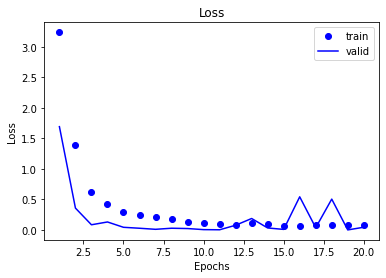

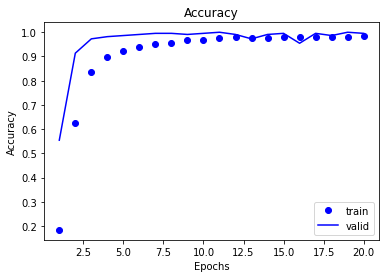

best val_acc: 1.0 epoch: 10
best val_loss: 0.0009429574711248279 epoch: 18


In [ ]:
history_dict = model_history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(history_dict["accuracy"]) + 1)

plt.plot(epochs, loss_values, "bo", label="train")
plt.plot(epochs, val_loss_values, "b", label="valid")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, acc_values, "bo", label="train")
plt.plot(epochs, val_acc_values, "b", label="valid")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

import numpy as np
print("best val_acc:", np.max(val_acc_values), "epoch:", np.argmax(val_acc_values))
print("best val_loss:", np.min(val_loss_values), "epoch:", np.argmin(val_loss_values))

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

4/4 [==============================] - 1s 274ms/step - loss: 0.1150 - accuracy: 0.9864
Test Accuracy: 0.9863636493682861


In [ ]:
from google.colab import files
from keras.preprocessing import image

In [ ]:
import zipfile

local_zip = 'new_test.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os

new_test_dir = '/content/new_test'
file_new_test = os.listdir(new_test_dir)

In [ ]:
total = 0
correct = 0
for fn in sorted(file_new_test):
  # predicting images
  path = '/content/new_test/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=42)

  total +=1
  if fn[:-5] == label[np.argmax(classes)]:
    correct += 1
  print(fn + "==>"+ label[np.argmax(classes)])

accuracy = correct/total*100
print("\n===========================\n")
print("Correct Prediction \t= "+str(correct))
print("Total Prediction \t= "+str(total))
print("Accuracy \t\t= "+str(accuracy)+"%")

ANHINGA1.jpg==>ANHINGA
ANHINGA2.jpg==>ANHINGA
ANHINGA3.jpg==>MASKED BOOBY
ANHINGA4.jpg==>ANHINGA
ANHINGA5.jpg==>CASPIAN TERN
ASIAN CRESTED IBIS1.jpg==>BALI STARLING
ASIAN CRESTED IBIS2.jpg==>ASIAN CRESTED IBIS
ASIAN CRESTED IBIS3.jpg==>ASIAN CRESTED IBIS
ASIAN CRESTED IBIS4.jpg==>ASIAN CRESTED IBIS
ASIAN CRESTED IBIS5.jpg==>ASIAN CRESTED IBIS
BALI STARLING1.jpg==>BALI STARLING
BALI STARLING2.jpg==>BALI STARLING
BALI STARLING3.jpg==>SAMATRAN THRUSH
BALI STARLING4.jpg==>BALI STARLING
BALI STARLING5.jpg==>BALI STARLING
BANDED BROADBILL1.jpg==>BANDED BROADBILL
BANDED BROADBILL2.jpg==>BANDED BROADBILL
BANDED BROADBILL3.jpg==>KOOKABURRA
BANDED BROADBILL4.jpg==>KOOKABURRA
BANDED BROADBILL5.jpg==>BANDED BROADBILL
BARN OWL1.jpg==>BARN OWL
BARN OWL2.jpg==>BARN OWL
BARN OWL3.jpg==>BARN OWL
BARN OWL4.jpg==>BARN OWL
BARN OWL5.jpg==>BARN OWL
BARN SWALLOW1.jpg==>BARN SWALLOW
BARN SWALLOW2.jpg==>BARN SWALLOW
BARN SWALLOW3.jpg==>BARN SWALLOW
BARN SWALLOW4.jpg==>BARN SWALLOW
BARN SWALLOW5.jpg==>BARN SWA

In [ ]:
uploaded = files.upload()
total = 0
benar = 0
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=42)
  #classes_idx = model.predict_classes(images)
  total +=1
  if fn[:-5] == label[np.argmax(classes)]:
    benar += 1
  print(fn + "==>"+ label[np.argmax(classes)])

akurasi = benar/total*100
print("\n===========================\n")
print("Prediksi yang Benar = "+str(benar))
print("Total prediksi = "+str(total))
print("Akurasi = "+str(akurasi)+"%")


In [ ]:
# Save as saved_model
model.save("saved_model/bird_model_vit")

save_tflite_path = "./bird_model_vit.tflite"

tf.compat.v1.enable_eager_execution()

# Weight Quantization - Input/Output=float32
converter = tf.lite.TFLiteConverter.from_saved_model('./saved_model/bird_model_vit/')
converter.experimental_new_converter = True
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
with open(save_tflite_path, 'wb') as w:
    w.write(tflite_quant_model)
print("Weight Quantization complete! -", save_tflite_path)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: saved_model/bird_model_vit/assets
Weight Quantization complete! - ./bird_model_vit.tflite


TESTING TFLITE MODEL

In [ ]:
#Load Tflite model and define the interpreter
TFLITE_MODEL= './bird_model_vit.tflite'
tflite_interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL)

tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

In [ ]:
#Test TFLite model with previous uploaded images
total = 0
correct = 0
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  tflite_interpreter.set_tensor(input_details[0]['index'], images)
  tflite_interpreter.invoke()
  classes = tflite_interpreter.get_tensor(output_details[0]['index'])

  total +=1
  if fn[:-5] == label[np.argmax(classes)]:
    correct += 1
  print(fn + "\t\t\t==>"+ label[np.argmax(classes)])

accuracy = correct/total*100
print("\n===========================\n")
print("Correct Prediction \t= "+str(correct))
print("Total Prediction \t= "+str(total))
print("Accuracy \t\t= "+str(accuracy)+"%")

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 3.9MB/s 
     |████████████████████████████████| 112kB 7.2MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [ ]:
# Save as saved_model
saved_model_inc_path="./saved_model/bird_model_inc"
model.save(saved_model_inc_path)

INFO:tensorflow:Assets written to: ./saved_model/bird_model_inc/assets


In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model {saved_model_inc_path} ./

2021-05-31 11:45:45.476796: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-31 11:45:48.136187: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-31 11:45:48.140694: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-31 11:45:48.141112: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-05-31 11:45:48.141156: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-31 11:45:48.144949: I tensorflow/stream_executor/pl

In [ ]:
from google.colab import files
file_model = os.listdir("/content/")
for f in file_model:
  if f[-4:]==".bin":
    f_dir = os.path.join("/content/",f)
    files.download(f_dir) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>